# NE 630 - Lesson 9

Let's revisit our simulation from Lesson 7, in which
 
  1. a neutron is born at $E_0 = 1$ MeV
  2. it scatters with either ${}^1$H or ${}^{16}$O 
  3. it exits the interaction with a new energy between $\alpha E$ and $E$.
  4. go back to (2) until its energy is below $E_n = 10^{-3}$ eV.
  
Along the way, we counted the number of collisions a neutron has to see if it matched $n = \ln(E_0/E_n)/\xi$.

We can modify this algorithm to keep track of which energies a neutron passes upon a scatter.  For example, suppose we selected $10^{-3}, 10^{-2}, \ldots 10^{5}$ eV as energy boundaries.  If a neutron of energy 5 eV scatters to 0.002 eV, then it will pass the 1 eV, 0.1 eV, and 0.01 eV points but not the final one at 0.001 eV.  Consequently, we would add a 1 to to the counters for 1, 0.1, and 0.01 eV.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
E0 = 2e6
En = 1e-3
np.log(E0/En)/0.924

23.17793616613242

In [2]:
np.logspace(-3, 5, 9)

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04,
       1.e+05])

In [3]:
n = 10000            # number of neutrons to simulate

energies = np.logspace(-3, 5, 9) # energy bin boundaries 
counts = np.zeros_like(energies) # and counts
for i in range(n):
    
    E = E0  # initialize my energy to 2 MeV
    while E > En:

        x = np.random.rand() # get a random number between 0 and 1
        if x < 3.8/(3.8+2*20):
            A = 16 # I scatter off of O
        else:
            A = 1  # I scatter off of H
        alpha = (A-1)**2 / (A+1)**2 
        
        # Pick my new energy uniformly from between alpha*E to E
        x = np.random.rand() # get another random number
        E_prime = (E-alpha*E)*x + alpha*E 
        
        for j in range(len(energies)):
            if E_prime < energies[j] < E:
                counts[j] += 1        
        
        E = E_prime    # My outgoing energy becomes my initial energy

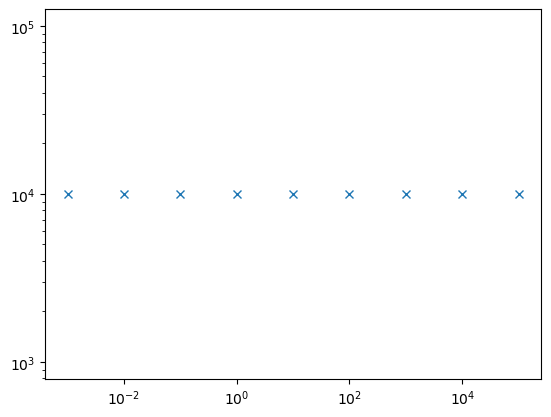

In [6]:
plt.loglog(energies, counts, 'x')